## 学习曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100
x = np.random.uniform(-3,3,size=m)
y = x **2 + x + 3 + np.random.normal(0.,1.,size=m)
X = x.reshape(-1,1)

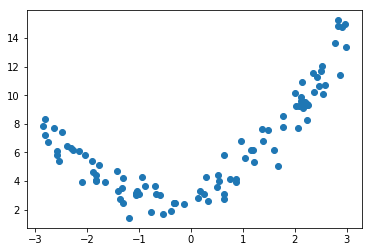

In [4]:
plt.scatter(x,y)
plt.show()

## 学习曲线

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [7]:
X_train.shape

(75, 1)

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error

In [16]:
X_train.shape[0]

75

In [36]:
train_score = []
test_score = []
for i in range(1, X_train.shape[0]):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

In [37]:
test_score

[33.764128354765404,
 88.80621739566037,
 62.00403522727402,
 65.71968045551901,
 19.65394112472692,
 19.547516943746317,
 23.911458678874613,
 13.094779678909822,
 14.299174717883544,
 14.210901921842781,
 15.98136644342012,
 15.915570292080343,
 15.98383909679698,
 15.676563625846217,
 17.1434211859461,
 18.507847408389043,
 18.11031365717676,
 13.644678157164126,
 11.605573825708632,
 11.704794268977327,
 12.235715831299991,
 12.115282577566054,
 12.012516126761398,
 12.03102116571364,
 11.937606993260498,
 12.314882642763637,
 12.263454609841158,
 12.60153332703655,
 12.585144527259226,
 12.544005636320907,
 12.628287763019134,
 13.333956682730488,
 13.485246267680134,
 14.083557609719978,
 14.053420345449751,
 12.521054324751706,
 12.297556772403222,
 11.99213026057366,
 12.165755589589862,
 12.174937805107131,
 11.960086152654391,
 11.905219972655022,
 11.851606307493087,
 11.965768773260802,
 12.041631530198465,
 12.058333177720426,
 12.20776837945386,
 12.208319916301168,
 12.6

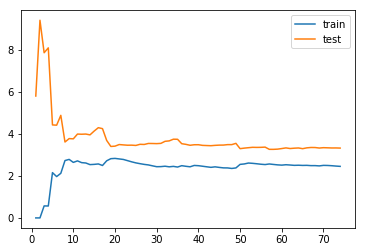

In [38]:
plt.plot([i for i in range(1,X_train.shape[0])],np.sqrt(train_score), label='train')
plt.plot([i for i in range(1,X_train.shape[0])],np.sqrt(test_score),label='test')
plt.legend()
plt.show()

In [87]:
def plot_learning_curve(algo, X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    train_score = []
    test_score = []
    
    lenX_train = X_train.shape[0]
    for i in range(1, lenX_train):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(sqrt(mean_squared_error(y_train[:i], y_train_predict)))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(sqrt(mean_squared_error(y_test, y_test_predict)))
    
    i_set = [i for i in range(1,lenX_train)]
    plt.plot(i_set,train_score, label="train")
    plt.plot(i_set,test_score, label="test")
    plt.plot(i_set,np.ones(len(i_set)),color='r')
    plt.axis([1,len(i_set),0,5])
    plt.legend()
    plt.show()
    

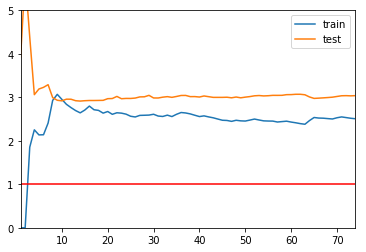

In [88]:
plot_learning_curve(LinearRegression(),X,y)

In [89]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [90]:
def poly_reg(degree):
    return Pipeline(
    [
        ('poly',PolynomialFeatures(degree=degree)),
        ('ss',StandardScaler()),
        ('lg',LinearRegression())
    ]
    )

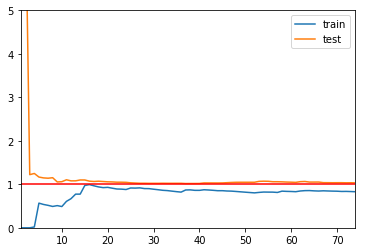

In [91]:
plot_learning_curve(poly_reg(2),X,y)

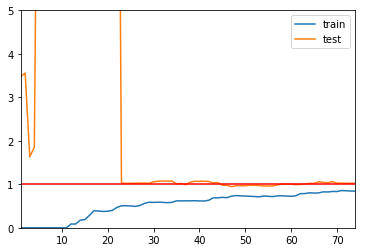

In [92]:
plot_learning_curve(poly_reg(10),X,y)

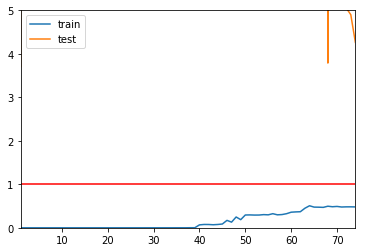

In [93]:
plot_learning_curve(poly_reg(100),X,y)